# LangGraph Tutorial: Building Agents with LangChain's Agent Framework

*Sourced and adapted from [getzep.com](https://www.getzep.com/ai-agents/langgraph-tutorial)*

----

The idea behind the agent in LangChain is to use an LLM and a sequence of actions; the agent then uses a reasoning engine to decide which action to take. LangChain was useful for simple agents with straightforward chains and retrieval flows, but building more complex agentic systems was overly complicated—memory management, persistence, and human-in-the-loop components were implemented manually, rendering chains and agents less flexible.

This is where [LangGraph](https://www.langchain.com/langgraph) comes into play. LangGraph is an orchestration framework built by [LangChain](https://www.langchain.com/). LangGraph allows you to develop agentic LLM applications using a graph structure, which can be used with or without LangChain.

This article focuses on building agents with LangGraph rather than LangChain. It provides a tutorial for building LangGraph agents, beginning with a discussion of LangGraph and its components. These concepts are reinforced by building a LangGraph agent from scratch and managing conversation memory with LangGraph agents.

# Summary of key LangGraph tutorial concepts
The following are the main concepts covered in this article.

### What is LangGraph?

LangGraph is an AI agent framework that implements agent interactions as stateful graphs. Nodes represent functions or computational steps that are connected via edges. LangGraph maintains an agent state shared among all the nodes and edges.
Unlike LangChain, LangGraph supports the implementation of more complex agentic workflows. Key features include built-in persistence, support for human intervention, and the ability to handle complex workflows with cycles and branches.

### Building a LangGraph agent

Creating a LangGraph agent is the best way to understand the core concepts of nodes, edges, and state. The LangGraph Python libraries are modular and provide the functionality to build a stateful graph by incrementally adding nodes and edges.
Incorporating tools enables an agent to perform specific tasks and access external information. For example, the ArXiv tool wrapper can return content from research papers.
LangGraph offers a prebuilt reason and act (ReACT) agent that can help you get started.

### Memory management in LangGraph

A LangGraph agent is stateless by default, meaning that it does not remember previous conversations, which limits its ability to have meaningful exchanges. To address this, LangGraph supports both short-term and long-term memory. Memory support in LangGraph can be extended further with Zep Memory.

### Guidelines for building LangGraph agents

LangGraph overcomes LangChain's limitations and is the recommended framework for building agentic architectures. You can integrate tools into your AI agents to provide functionality or fetch information that an LLM agent does not provide. Memory is integral to building production-ready AI agents, and third-party SDKs like Zep simplify adding long-term capabilities.

# What is LangGraph?

LangGraph is an AI agent framework built on LangChain that allows developers to create more sophisticated and flexible agent workflows. Unlike traditional LangChain chains and agents, LangGraph implements agent interactions as cyclic graphs with multiple-step processing involving branching and loops. This eliminates the need to implement custom logic to control the flow of information between multiple agents in the workflow.

## How LangGraph works

As the name suggests, LangGraph is a graph workflow consisting of nodes and edges. The nodes implement functionality within the workflow while the edges control its direction.

The following diagram best explains how LangGraph works at a high level.

![langgraph](https://cdn.prod.website-files.com/6720fd49425e367c9ec40a97/675093ca4dd7b153dc7a046c_AD_4nXdFYTcoraafSzSgyhYjonQwD1-a1HT7nIwEm1GI7DB6eIknpIiJxpuGW0HZk0INnmTjSZDK4MLTPqj-nfR9XC_d1RLvWVTLZqwPluaIJ9zuEyJew2JaWf1Lxbw6h0HiXPipU5Gp.png)
*A high-level overview of a LangGraph agent and its components*

A LangGraph agent receives input, which can be a user input or input from another LangGraph agent. Typically, an LLM agent processes the input and decides whether it needs to call one or more tools, but it can directly generate a response and proceed to the next stage in the graph.

If the agent decides to call one or more tools, the tool processes the agent output and returns the response to the agent. The agent then generates its response based on the tool output. Once an agent finalizes its response, you can further add an optional “human-in-the-loop” step to refine the agent response before returning the final output.

This is just one example of how LangGraph agents work at a high level. You can create different combinations of nodes and edges to achieve your desired functionality.

## Persistence
One key LangGraph feature that distinguishes it from traditional LangChain agents is its built-in persistence mechanism. LangGraph introduces the concept of an agent state shared among all the nodes and edges in a workflow. This allows automatic error recovery, enabling the workflow to resume where it left off.

In addition to the agent state memory, LangGraph supports persisting conversation histories using short-term and long-term memories, which are covered in detail later in the article.

## Cycles
LangGraph introduces cycling graphs, allowing agents to communicate with tools in a cyclic manner. For example, an agent may call a tool, retrieve information from the tool, and then call the same or another tool to retrieve follow-up information. Similarly, tools may call each other multiple times to share and refine information before passing it back to an agent. This differentiates it from DAG-based solutions.

## Human-in-the-loop capability
LangGraph supports human intervention in agent workflows, which interrupts graph execution at specific points, allowing humans to review, approve, or edit the agent’s proposed response. The workflow resumes after receiving human input.

This feature fosters greater control and oversight in critical decision-making processes in an agent’s workflow.

## LangGraph agents vs. LangChain agents

Before LangGraph, LangChain chains and agents were the go-to techniques for creating agentic LLM applications. The following table briefly compares LangGraph agents with traditional LangChain chains and agents.

| Feature	| LangGraph agents	| LangChain agents |
|-----|----|----|
| Structure	| Graph-based	| Linear or tree-like with custom implementation |
| Persistence	| Built-in	| Manual implementation required |
| State management	| Automated	| Manual implementation required |
| Human intervention	| Native support	| Manual implementation required |
| Cycles	| Supported	| No direct support |
| Flexibility	| Highly flexible, with loops and branches	| Limited compared to LangGraph |
| Complexity	| Can handle complex workflows	| Better for simpler tasks |

To summarize, LangGraph supports implementing more complex agentic workflows while allowing higher flexibility than traditional LangChain chains and agents.

## Understanding nodes, edges, and state
If you are new to LangGraph, you must understand a few terms before creating an agent: nodes, edges, and state.

![nodes, edges, state](https://cdn.prod.website-files.com/6720fd49425e367c9ec40a97/675094d67463792c26563f5c_AD_4nXeKdfsPke3Cds_gTPJYQsU9XRkGNuJYok56w-XVcL3MYFV_VZUxfyHmj4qdFT34tmYxGaRYy8CL2ofVe4WbfuW4VSiU88dNvwFI6Q-mNwk6EQEv4USHbL-I1XvknylUXKSMo9H_RQ.png)
*A simple graph in LangGraph showing nodes, edges, and states ([source](https://medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48))*

### Nodes

Nodes are the building blocks of your agents and represent a discrete computation unit within your agent’s workflow. A node can be as simple as a small Python function or as complex as an independent agent that calls external tools.



### Edges

Edges connect nodes and define how your agent progresses from one step to the next. Edges can be of two types: direct and conditional. A direct edge simply connects two nodes without any condition, whereas a conditional node is similar to an if-else statement and connects two nodes based on a condition.

### State

A state is LangGraph’s most underrated yet most essential component. It contains all the data and context available to different entities, such as nodes and edges. Simply put, the state shares data and context among all nodes and edges in a graph.

‍


# Building a LangGraph agent

Enough with the theory—in this section, you will see all the building blocks of LangGraph agents in action. You will learn how to:

* Create a LangGraph agent from scratch
* Incorporate tools into LangGraph agents
* Stream agent responses
* Use built-in agents

## Installing and importing required libraries
This article uses the Python version of LangGraph for examples. To run scripts in this section and the upcoming sections, you need to install the following Python libraries, which allow you to access the various LangGraph functions and tools you will incorporate into your agents.

In [1]:
!pip install langchain-core
!pip install -U langgraph
!pip install langchain-community
!pip install --upgrade --quiet wikipedia
!pip install arxiv
!pip install langchain-google-genai

Let's import relevant functionalities from the modules above.

In [2]:
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage, AIMessage, trim_messages
from langchain_core.tools import tool, ToolException, InjectedToolArg
from langchain.tools import Tool, StructuredTool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.runnables import RunnableConfig
from langchain_community.utilities import ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun, HumanInputRun
from langgraph.graph import StateGraph,START,END, add_messages, MessagesState
from langgraph.prebuilt import create_react_agent, ToolNode
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.base import BaseStore
from langgraph.store.memory import InMemoryStore
from typing import Annotated, Optional
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
import wikipedia
import uuid
import operator
from IPython.display import Image, display
import os
import getpass
from langchain_google_genai import ChatGoogleGenerativeAI
import textwrap
from datetime import datetime
import requests

## Define the LLM we will use

#### Getting a Gemini API key

1. Go to https://ai.google.dev/gemini-api/docs/api-key
2. Sign in, if you aren't signed in yet.
3. Click the blue 'Get a Gemini API key in Google AI Studio' button and follow the instructions
4. Use the key you generated when asked for the `GOOGLE_API_KEY` below.

In [3]:
# Store Gemini and Tavily API keys
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


In [4]:
# Create LLM model
model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_retries=2
)

## Creating a LangGraph agent from scratch
Let's start with the state definition, which specifies what type of information will flow between different nodes and edges in a graph.

In [5]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

This defines a simple state that stores a list of any type of LangChain message, such as ToolMessage, AIMessage, HumanMessage, etc. The **operator.add** operator will add new messages to the list instead of overwriting existing ones.

Next, we will define a simple Python function to add a node in our LangGraph agent.

In [6]:
def run_llm(state: State):
    messages = state['messages']
    message = model.invoke(messages)
    return {'messages': [message]}

The **run_llm()** function accepts an object of the **State** class that we defined before. When we add the **run_llm()** function to a LangGraph node, LangGraph will automatically pass the agent’s state to the **run_llm()** function.

Let's now create our graph.

In [7]:
graph_builder=StateGraph(State)
graph_builder.add_node("llm", run_llm)
graph_builder.add_edge(START,"llm")
graph_builder.add_edge("llm",END)

graph=graph_builder.compile()

To create a graph, we will create a **StateGraph** object and define the state type in the **StateGraph** constructor. Subsequently, we will add a node titled **llm** and add the **run_llm()** function to the node.

We add two edges that define the start and end of the agent execution. Our agent has a single node, so we start with the **llm** node and end the agent execution once we receive the response from the **llm** node.

Finally, we must compile the graph using the **compile()** method.

We can visualize the graph using the following script:

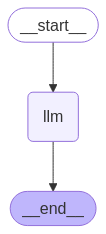

In [8]:
display(Image(graph.get_graph().draw_mermaid_png()))

Let's test the agent we just created. To do so, call the **invoke()** method on the **graph** object created.

In [9]:
messages = [HumanMessage(content="Tell me a joke about mathematics")]
result = graph.invoke({"messages": messages})
print(result['messages'][-1].content)

Why was the math book sad?

Because it had too many problems!


In most cases, you will need LangGraph agents to use tools to respond appropriately. The following section explains how to incorporate tools into LangGraph agents.

## Incorporating tools into LangGraph agents

An AI tool is a component that enhances the default functionalities of an AI agent, allowing it to perform a specific task or access external information. For example, you can use tools to access the web, connect to an external database, book a flight, etc.

You can incorporate custom and [**built-in LangChain**](https://python.langchain.com/v0.1/docs/integrations/tools/) tools into your LangGraph agents; the approaches remain very similar. In this section, we will see both tool types.

Incorporating a tool into an agent is a highly flexible process. You can directly add a tool to an agent’s node or a function to a node that calls one or multiple tools. The latter approach is recommended because it allows for more customization.

Let’s first see how to use a built-in LangChain tool in LangGraph. We will use the LangChain ArXiv tool wrapper to create a tool that returns research papers based on user queries.

In [10]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)

In [11]:
def get_arxiv_data(query):
    data = arxiv_tool.invoke(query)
    return data

class ArticleTopic(BaseModel):
    topic: str = Field(description="The topic of the article to search on arxiv.")

@tool (args_schema=ArticleTopic)
def arxiv_search(topic: str) -> str:
    """Returns the information about research papers from arxiv"""
    return get_arxiv_data(topic)

In the script above, we define the function **get_arxiv_data()**, which accepts a user query and calls the LangChain ArXiv tool to return research paper information related to a user query.

Next, we inherit the **BaseModel** class to define the data type our tool will accept as a parameter, which ensures that input to the tool always has a valid input data type.

Finally, we use the **@tool** decorator and create an **arxiv_search** tool that calls the **get_arxiv_data** function. The tool description is critical in this case since the LLM agent selects a tool based on its description.

In the same way, we create a custom tool, as the following script shows:

In [12]:
def get_wiki_data(topic):
    data = wikipedia.summary(topic)
    return data

class WikipediaTopic(BaseModel):
    topic: str = Field(description="The wikipedia article topic to search")

@tool(args_schema = WikipediaTopic)
def wikipedia_search(topic: str) -> str:
    """Returns the summary of wikipedia page of the passed topic"""
    return get_wiki_data(topic)

The tool above uses the Python Wikipedia library to return Wikipedia article summaries based on user queries.

Once you create your tools, the next step is to bind them to the LLM you will use in your agent.

In [13]:
tools = [arxiv_search, wikipedia_search]
tools_names = {t.name: t for t in tools}
model = model.bind_tools(tools)

In the next step, we define a function that executes whenever an agent decides to call one or more tools.

In [14]:
def execute_tools(state: State):
    tool_calls = state['messages'][-1].tool_calls
    results = []
    for t in tool_calls:

      if not t['name'] in tools_names:
        result = "Error: There's no such tool, please try again"
      else:
        result = tools_names[t['name']].invoke(t['args'])

        results.append(
          ToolMessage(
            tool_call_id=t['id'],
            name=t['name'],
            content=str(result)
          )
        )

    return {'messages': results}

The **execute_tools** function above will be added to a LangGraph agent's node, automatically receiving the agent's current state. We will only call the **execute_tools()** function if the agent decides to use one or more tools.

Inside the execute_tools function, we will iteratively call the tools and pass the arguments from the LLM's last response to them. Finally, we will append the tool response to the **results[]** list and add the list to the model state using the state's **messages** list.

The last and final step before creating a graph is to define a function that checks whether the agent's latest state contains tool calls.

In [15]:
def tool_exists(state: State):
    result = state['messages'][-1]
    return len(result.tool_calls) > 0

We will use this function to create a conditional edge, which decides whether to go to the **execute_tools()** function or the END node and returns the agent’s final response.

Now let’s create a LangGraph agent that uses the tool we created. The following script defines the agent’s state and the **run_llm()** function as before.

In [16]:
class State(TypedDict):
  messages: Annotated[list[AnyMessage], operator.add]

def run_llm(state: State):
    messages = state['messages']
    message = model.invoke(messages)
    return {'messages': [message]}

The script below defines and displays the complete agent graph.

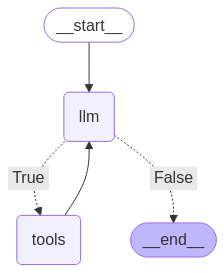

In [17]:
graph_builder=StateGraph(State)
graph_builder.add_node("llm", run_llm)
graph_builder.add_node("tools", execute_tools)
graph_builder.add_conditional_edges(
    "llm",
     tool_exists,
    {True: "tools", False: END}
    )
graph_builder.add_edge("tools", "llm")
graph_builder.set_entry_point("llm")
graph=graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

We have two nodes in the graph: the **llm**, which runs the **run_llm()** function, and the **tools** node, which runs the **execute_tools()** function. The conditional node connects the **llm** node with the **tool** or the END node depending upon the output of the **llm** node. We also add an edge back from the **tools** to the **llm** node because we want the **llm** node to generate the final response with or without the help of the tool.

Now let's test the agent we created. We will first ask the agent to return a research paper.

In [18]:
messages = [HumanMessage(content="Give me the latest research paper on attention is all you need")]
result = graph.invoke({"messages": messages})
result

{'messages': [HumanMessage(content='Give me the latest research paper on attention is all you need', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'arxiv_search', 'arguments': '{"topic": "attention is all you need"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-769f0c66-1e15-412b-bddf-ab97e7519394-0', tool_calls=[{'name': 'arxiv_search', 'args': {'topic': 'attention is all you need'}, 'id': 'b63039fd-9bfd-4394-8fc5-6405b2f453ee', 'type': 'tool_call'}], usage_metadata={'input_tokens': 56, 'output_tokens': 9, 'total_tokens': 65, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content="Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand f

The output above shows that the model has called the **arxiv_tool** to generate the response. The model is intelligent enough to infer any query about research papers must be routed to the **arxiv_search** tool.

Let’s search for something on Wikipedia.

In [19]:
messages = [HumanMessage(content="Wikipedia article on artificial intelligence")]
result = graph.invoke({"messages": messages})
result

{'messages': [HumanMessage(content='Wikipedia article on artificial intelligence', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'wikipedia_search', 'arguments': '{"topic": "artificial intelligence"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-4c8f0b10-1ac1-467f-9456-b4097a318a06-0', tool_calls=[{'name': 'wikipedia_search', 'args': {'topic': 'artificial intelligence'}, 'id': 'b49d414d-e4d4-4bf7-9dd2-2f608375ac4b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 49, 'output_tokens': 6, 'total_tokens': 55, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='Artificial intelligence (AI) refers to the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in c

You can see that the model used the **wikipedia_search** tool to generate the final response.

## Streaming agent responses
You can also stream the individual responses from all nodes and edges in your LangGraph agent. Streaming messages allows users to receive responses in real-time. To do so, you can call the **stream()** function instead of the **invoke()** method.

Let’s define a function that receives streaming agent response and displays it on the console.

In [20]:
def wrap_text(text, width=100):
    text_split = text.split("\n")
    wrapped_text = textwrap.fill(text_split[0], width)
    if len(text_split) > 1:
        for line in text_split[1:]:
            wrapped_text += "\n" + textwrap.fill(line, width)
    return wrapped_text

def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            print(wrap_text(message.pretty_repr()))

Next, call **graph().stream()** and pass it the input messages. Also set the attribute **stream_mode** to values, which displays the values of the streaming agent responses. To make things easier, we'll define a method that can both stream (`verbose=True`) or show only the final answer (`verbose=False`).

In [21]:
def ask(agent, question, config=None, verbose=False):
    messages = [HumanMessage(content=question)]
    if verbose:
        print_stream(agent.stream({"messages": messages}, config=config, stream_mode= "values"))
    else:
        result = agent.invoke({"messages": messages}, config=config)
        print(wrap_text(result['messages'][-1].content))

In [22]:
ask(graph, "Who is Christiano Ronaldo", verbose=True)

================================ Human Message =================================

Who is Christiano Ronaldo
================================== Ai Message ==================================
Tool Calls:
  wikipedia_search (5e333443-d62c-41fb-9867-0c1997caee35)
 Call ID: 5e333443-d62c-41fb-9867-0c1997caee35
  Args:
    topic: Cristiano Ronaldo
================================= Tool Message =================================
Name: wikipedia_search

Cristiano Ronaldo dos Santos Aveiro (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu] ; born 5
February 1985) is a Portuguese professional footballer who plays as a forward for and captains both
Saudi Pro League club Al Nassr and the Portugal national team. Nicknamed CR7, he is widely regarded
as one of the greatest players of all time, and has won numerous individual accolades throughout his
professional footballing career, including five Ballon d'Or awards, three the Best FIFA Men's Player
awards, a record four UEFA Men's Player of the Year Awar

You will see real-time responses from each graph node printed on the console. For example, in the output above, you can see the human message followed by the AI response, which contains tool calls to the **wikipedia_search** tool. The tool returns the response to the user query; this is again passed to the AI node, which generates the final response.

## Using built-in agents
In previous sections, we created an agent that checks whether it needs a tool's help to generate a final response. If it does, it calls the tool, fetches the tool response, and returns the final response; if it doesn't, it simply returns the default LLM response. We can use LangGraph’s built-in [**ReAct agent**](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/#code) to achieve the same functionality.

You can use the **react_search_agent()** from the **langgraph.prebuilt** module to create a ReAct agent. To define the ReAct agent's functionality, pass the **system_prompt** to the **prompt** attribute.

The following script creates a ReAct agent that uses the tool we created in previous sections:



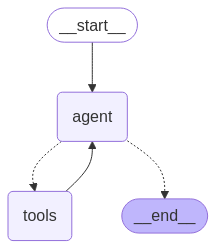

In [23]:
prompt = """
    You are an expert researcher. Your goal is to search wikipedia for general queries
    related to famous things, places, persons, etc.
    You can also search for arxiv if the user asks to search for research papers.
    Use your default knowledge for general queries
"""

react_search_agent = create_react_agent(model, tools, prompt=prompt)
display(Image(react_search_agent.get_graph().draw_mermaid_png()))

You can see that the ReAct agent above is very similar to what we created earlier from scratch.

Let’s test the agent by asking a simple question that doesn't require any tool’s help.

In [24]:
ask(react_search_agent, "What is 2 + 2", verbose=True)

================================ Human Message =================================

What is 2 + 2
================================== Ai Message ==================================

4


You can see that the ReAct agent generated a response without any tool’s assistance.

Let’s send another request.

In [25]:
ask(react_search_agent, "What is the Eiffel tower?", verbose=True)

================================ Human Message =================================

What is the Eiffel tower?
================================== Ai Message ==================================
Tool Calls:
  wikipedia_search (a812fe0b-1715-42f5-acbb-fcc8681ee735)
 Call ID: a812fe0b-1715-42f5-acbb-fcc8681ee735
  Args:
    topic: Eiffel Tower
================================= Tool Message =================================
Name: wikipedia_search

The Eiffel Tower (  EYE-fəl; French: Tour Eiffel [tuʁ ɛfɛl] ) is a wrought-iron lattice tower on the
Champ de Mars in Paris, France. It is named after the engineer Gustave Eiffel, whose company
designed and built the tower from 1887 to 1889.
Locally nicknamed "La dame de fer" (French for "Iron Lady"), it was constructed as the centerpiece
of the 1889 World's Fair, and to crown the centennial anniversary of the French Revolution. Although
initially criticised by some of France's leading artists and intellectuals for its design, it has
since become a gl

This time, the agent called the **wikipedia_search** tool before generating the final response.

# Memory management in LangGraph
By default, interaction with LangGraph agents is stateless, which means that the agent does not remember the previous conversation and cannot generate responses to follow-up queries. In this section, you will see why you need agents with memory and how to create LangGraph agents that remember previous conversations.

## Why do you need agents with memory?
The answer is simple: Humans have memory and can answer follow-up questions. You want your agents to remember what was previously discussed so that they can have a meaningful conversation.

Let’s see an example where a user interacts with an agent without conversational memory.  We ask the agent: “Who is Christiano Ronaldo?”

In [26]:
ask(react_search_agent, "Who is Christiano Ronaldo?")

Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward
for and captains both Saudi Pro League club Al Nassr and the Portugal national team. He is widely
regarded as one of the greatest players of all time. He has won numerous individual accolades
throughout his professional footballing career, including five Ballon d'Or awards, three The Best
FIFA Men's Player awards, a record four UEFA Men's Player of the Year Awards, four European Golden
Shoes, and the FIFA Puskás Award.


Here, the agent probably called the **wikipedia_search** tool to generate the response. Let’s ask a follow-up question about Christiano Ronaldo.

In [27]:
ask(react_search_agent, "To which country does he belong?")

Could you please provide me with the name of the person you are asking about?


You can see that the model doesn’t remember what we asked it previously. Though we could append previous conversations before the current message to provide context to the LLM, an LLM's context window is limited and will eventually be filled, leading to slower agent responses and, in some cases, truncation of conversation context.

Models with very large context windows can store an entire chat history, leading to recall issues where the model may overlook older conversations. Additionally, a large context window might introduce contradictory information if there are conflicting details from earlier parts of the conversation, potentially confusing the model. Lastly, using larger prompts can significantly increase the cost of processing.

The ability of an AI agent to remember previous conversations is crucial in almost all agent types, ranging from medical agents, where an agent must remember a patient’s previous information, to e-commerce agents, where it is important for an agent to remember user preferences to provide a customized response.

The diagram below shows an LLM-powered agent's components; tools were used to retrieve additional information in the examples above. In the examples below, the role of memory will be explained.

![image.png](https://cdn.prod.website-files.com/6720fd49425e367c9ec40a97/67509cfe66a39e5e5204e4d5_AD_4nXfBIMTNNen26DfF7xqoA0UcXJ_azMYO5zYRNG7PKO8KRXfTDwOzXBi2MOYxwtSzEVjoAAOjGAUAVVAdwB1VB24jSoZ7QO5RwBHQQ0GikdNPdP8mLkoxfR5KBnLRf5MQG0C-uCdENg.png)

General components of an AI agent ([source](https://lilianweng.github.io/posts/2023-06-23-agent/))

## Creating LangGraph agents with memory
LangGraph agents can be created with short-term or long-term memory.

### Agents with short-term memory
The easiest way to add persistence to your interactions with LangGraph agents is via checkpointers. To do so, you must pass a memory object (in memory or third-party) to the **checkpointer** attribute while compiling a LangGraph agent. For example:

`graph.compile(checkpointer=memory)`

For a ReAct agent, you can pass the memory object to the **checkpointer** attribute of the **create_react_agent()** function.

Next, while invoking the graph, you must pass the **configurable** dictionary containing the value for the **thread_id** key. The memory is associated with this **thread_id**.

In [28]:
memory = MemorySaver()
react_search_agent = create_react_agent(model, tools, prompt=prompt, checkpointer=memory)

config = {"configurable": {"thread_id": "1"}}

ask(react_search_agent, "Who is Christiano Ronaldo?", config=config)

Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward
for and captains both Saudi Pro League club Al Nassr and the Portugal national team. He is widely
regarded as one of the greatest players of all time. He has won numerous individual accolades
throughout his professional footballing career, including five Ballon d'Or awards, three The Best
FIFA Men's Player awards, a record four UEFA Men's Player of the Year Awards, four European Golden
Shoes, and the FIFA Puskás Award.


In [29]:
ask(react_search_agent, "To which country does he belong?", config=config)

He belongs to Portugal.


You can see that the agent remembers that we are asking a question about Christiano Ronaldo. However, one drawback of short-term memory is that it is not shared between multiple sessions or threads. For example, if you change the thread_id and ask the same question, the agent will not understand the follow-up query.

In [31]:
config = {"configurable": {"thread_id": "2"}}
ask(react_search_agent, "To which country does he belong?", config=config)

I need more context to answer. Please specify who you are referring to.


The other drawback of short-term memory is that the entire chat history might not fit the model context window. Longer chat histories can be complex and often introduce hallucinations in agent responses.

### Agents with long-term memory
Recently, LangGraph introduced long-term memory, which you can share across multiple threads. You can also extract facts from user conversations and add them to long-term memory, leading to a shorter and more robust chat context.

You can use LangGraph’s **InMemoryStore** class to manage and store long-term memories. This class stores memories in namespaces, each of which may include multiple memories. Each memory has a memory ID, while context and content are key-value pairs.

The following script shows an example of storing a long-term memory in an **InMemoryStore** object using the put() method.

In [32]:
memory_store = InMemoryStore()

user_id = "123"
namespace = (user_id, "memories")

memory_id = "001"
memory = {"food preferences" : "I like apples"}
memory_store.put(namespace, memory_id, memory)

You can see memories in a namespace using the following script:

In [33]:
memories = memory_store.search(namespace)
memories[-1].dict()

{'namespace': ['123', 'memories'],
 'key': '001',
 'value': {'food preferences': 'I like apples'},
 'created_at': '2025-03-21T15:46:13.003675+00:00',
 'updated_at': '2025-03-21T15:46:13.003679+00:00',
 'score': None}

Now we will create another memory for the same user:

In [34]:
memory_id = "002"
memory = {"sports preferences" : "I like to play football"}
memory_store.put(namespace, memory_id, memory)

memories = memory_store.search(namespace)

for memory in memories:
    print(f"Memory ID: {memory.key}, Memory Value: {memory.value}")

Memory ID: 001, Memory Value: {'food preferences': 'I like apples'}
Memory ID: 002, Memory Value: {'sports preferences': 'I like to play football'}


You can see two memories in the memory store now. Let’s see how you can create a LangGraph agent that uses LangGraph’s long-term memory.

We will create a tool that accepts the memory ID, content, and context and inserts them in a memory store. The tool also accepts the configuration dictionary containing the user ID and the memory store object.

If the memory ID is not passed, it creates a new memory ID; otherwise, it updates the content of the passed memory ID.

In [35]:
@tool
def upsert_memory(
    content: str,
    context: str,
    memory_id: Optional[str] = None,
    *,
    config: Annotated[RunnableConfig, InjectedToolArg],
    store: Annotated[BaseStore, InjectedToolArg],
):
    """
    Insert or update a memory entry in the database.

    If a memory entry with the provided ID is found, the function modifies it with new details.
    If no such entry exists, it creates a fresh record, ensuring no duplicate memories are stored.
    When users revise a memory, it is replaced with the updated content.

    Args:
        content: The actual details of the memory. For example:
            "User likes to eat pizza and fries."
        context: Additional background for the memory. For example:
            "This was mentioned when the user introduced himself."
        memory_id: Only include this only if an existing memory is being modified.
            It specifies which memory should be updated.
    """

    mem_id = memory_id or uuid.uuid4()
    user_id = config["configurable"]["user_id"]
    namespace = ("memories", user_id)
    store.put(
        namespace,
        key=str(mem_id),
        value={"content": content, "context": context},
    )
    return f"{content}"

We will define the **update_memory** function to add to our LangGraph agent node. It will receive the graph’s state, the configuration dictionary, and the **InMemoryStore** object. The function extracts the memory content and context from the graph’s state and the user ID from the configuration dictionary.

In [36]:
def update_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):

    # Retrieve the tool call history from the most recent message
    recent_tool_calls = state["messages"][-1].tool_calls
    memory_entries = []

    # Process each tool call to save memory data
    for call in recent_tool_calls:
        memory_content = call['args']['content']
        memory_context = call['args']['context']
        memory_entries.append([
            upsert_memory.invoke({'content': memory_content, 'context': memory_context, 'config': config, 'store': store})
        ])
    print("Stored memories: ", memory_entries)

    # Generate a results list with each memory entry's details
    response_data = [
        {
            "role": "tool",
            "content": memory_entry[0],
            "tool_call_id": call["id"],
        }
        for call, memory_entry in zip(recent_tool_calls, memory_entries)
    ]

    # Return the first message result in the response
    return {"messages": response_data[0]}

The function passes these values to the **upsert_memory** tool. The **update_memory** function adds the tool’s response to the state. Next, we define the **run_llm()** function, which extracts memories from the **InMemoryStore** object using the user ID and invokes the LLM model using the memories and the user’s new query.

In [37]:
def run_llm(state: MessagesState, config: RunnableConfig, *, store: BaseStore):
    user_id = config["configurable"]["user_id"]
    namespace = ("memories", user_id)
    memories = store.search(namespace)

    user_info = "\n".join(f"[{mem.key}]: {mem.value}" for mem in memories)
    if user_info:
        user_info = f"""
    <user_memories>
    {user_info}
    </user_memories>"""

    system_msg = f'''You are a helpful AI assistant answering user questions.
    You must decide whether to store information in the memory from the list of messages and then answer the user query or directly answer the user query.
    Here is the information about the user: {user_info}'''

    response = model.bind_tools([upsert_memory]).invoke(
        [{"type": "system", "content": system_msg}] + state["messages"]
    )
    return {"messages": response}

The last step is to define the **tool_exists** function, which decides whether we need to store user facts in memory.

In [38]:
def tool_exists(state: MessagesState):
    """Check if an agent selects a tool and decide whether to store memory."""
    msg = state["messages"][-1]
    if msg.tool_calls:
        # If an agent selects a tool, we need to update the memory
        return "update_memory"
    # else, directly respond to the user
    return END

Finally, we will create our LangGraph agent that uses long-term memory to respond to user queries:

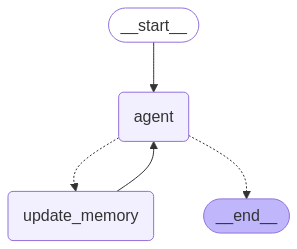

In [39]:
memory_store = InMemoryStore()

graph_builder = StateGraph(MessagesState)

graph_builder.add_node("agent", run_llm)
graph_builder.add_node(update_memory)
graph_builder.add_conditional_edges("agent", tool_exists, ["update_memory", END])
graph_builder.add_edge("update_memory", "agent")

graph_builder.set_entry_point("agent")
graph = graph_builder.compile(store=memory_store)

display(Image(graph.get_graph().draw_mermaid_png()))

The agent is similar to the ReAct agent we created earlier but maintains a long-term user memory. Let’s test the agent.

In [40]:
config = {"configurable": {"user_id": "2"}}
ask(graph, "Hello, my name is James, and I like AI", config=config)

Stored memories:  [['User likes AI.']]
Nice to meet you, James!


You can see that the agent called the **upsert_memory** tool and inserted some user information into long-term memory.

In [41]:
config = {"configurable": {"user_id": "2"}}
ask(graph, "What do you know about me?", config=config)

Stored memories:  [['User likes AI.']]
You like AI.


This shows that the agent remembers the user information. Since there was nothing to add to memory this time, the agent did not call any tool and directly responded to the user.

## Problems with LangGraph’s default memory options
Though LangGraph provides several default options to store memories, it has certain drawbacks:

* Short-term memories are not shared between multiple sessions and threads.
* The memory context can exceed the LLM model context; in such cases, you must trim or summarize memories to fit the model context.
* Extremely long memory contexts may induce hallucinations in LLM models.
* LangGraph’s default long-term memory solves most problems associated with short-term memory. However, even with LangGraph's default long-term memory, generating and updating facts from the conversation history and invalidating existing facts to have the most updated user information is challenging.

# Guidelines for building LangGraph agents
Here are some of the guidelines you should follow while working with LangChain agents:

* Remember that LangGraph was built by the creators of LangChain but can be used without LangChain. It is a more powerful framework for building AI Agents because LangGraph allows you to define flows that involve cycles, which is essential for most agentic architectures.
* Tools are integral to LangGraph agents, but they should not be overused. Only implement tools to fetch information that an LLM agent does not possess by default.
* The tool description should include as much detail as possible. This will help the agent select the correct tool for the task.
* An agent is only as good as its context. Depending on your requirements, store all the relevant information from past conversations in short- or long-term memory.
* Third-party SDKs (like [Zep](https://help.getzep.com/sdks)) can make your life easier by automatically managing memory and storing conversation facts, permitting a personalized user experience.



# Last thoughts
LangGraph agents provide a flexible way to develop complex LLM applications. This article explains LangGraph agents and how to implement them with detailed examples. Adding external tools enables the agents to retrieve external information, and persisting memory across conversations enables the LangGraph agent to provide contextualized responses.

# Some more tools you can experiment with



## Web search tool using Tavily

We'll use the Tavily API for searching the web

1. Signup at https://app.tavily.com/
2. Verify your e-mail.
2. Sign in. You should land on the 'Overview' page which shows you an API key.
5. Use this key when asked for the `TAVILY_API_KEY` below.

In [46]:
if "TAVILY_API_KEY" not in os.environ:
    os.environ["TAVILY_API_KEY"] = getpass.getpass("Enter your Tavily API key: ")

In [47]:
tavily_search = TavilySearchResults(max_results=2)
tavily_search.description

'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.'

In [48]:
tavily_search.description += " Also useful if you are missing information or context about a question that you would need to use another tool."
tavily_search.description

'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query. Also useful if you are missing information or context about a question that you would need to use another tool.'

In [49]:
tavily_search.run("elon musk")

[{'title': 'Elon Musk - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/Elon_Musk',
  'content': "Elon Reeve Musk (/ˈiːlɒn mʌsk/; born June 28, 1971) is a businessman and U.S. special Government employee, best known for his key roles in Tesla, Inc., SpaceX, and his ownership of Twitter. Musk is the wealthiest individual in the world; as of January\xa02025, Forbes estimates his net worth to be US$426 billion. Musk's actions and expressed views have further solidified his status as a public figure. [...] Elon Reeve Musk was born on June 28, 1971, in Pretoria, South Africa's administrative capital.[3][4] He is of British and Pennsylvania Dutch ancestry.[5][6] His mother, Maye (née\xa0Haldeman), is a model and dietitian born in Saskatchewan, Canada, and raised in South Africa.[7][8][9][a] His father, Errol Musk, is a South African electromechanical engineer, pilot, sailor, consultant, emerald dealer, and property developer, who partly owned a rental lodge at Timbavati Private Nature [.

## Datetime tool

In [50]:
datetime_tool = Tool(
    name="date_today",
    func=lambda x: datetime.now().strftime("%A, %B %d, %Y"),
    description="Returns today's date. This can be used to calculate time differences between a given date and today.",
)
datetime_tool.run("")

'Friday, March 21, 2025'

## Weather tool using Visual Crossing

We will use the Weather API from `visualcrossing`. You have to generate you API key that you can later use to access this API. Follow the steps below:

1. Signup up at https://www.visualcrossing.com/
2. Verify your account
3. Sign in and click on `Account` (blue button in the top right corner)
4. Under `Details` you should be able to see a `Key`
5. Use this key when asked for the `WEATHER_API_KEY` below.

In [51]:
if "WEATHER_API_KEY" not in os.environ:
    os.environ["WEATHER_API_KEY"] = getpass.getpass("Enter your Virtual Crossing API key: ")

Enter your Virtual Crossing API key: ··········


In [52]:
# Define the function
def extract_city_current_temperature(city:str)->str:

    weather_key = os.environ["WEATHER_API_KEY"]

    # Build the API URL
    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{city}?key={weather_key}&unitGroup=metric"

    response = requests.get(url)

    # extract response
    if response.status_code == 200:
        data = response.json()
        current_temp = data["currentConditions"]["temp"]
        output = f"Current temperature in {city}: {current_temp}°C\n\n"
    else:
        output = f"Error: {response.status_code}\n\n"

    return output

# Input parameter definition
class WeatherInput(BaseModel):
    city: str = Field(description="City name")


# the tool description
description: str = (
        "Allows to extract the current temperature in a specific city"
    )

# fuse the function, input parameters and description into a tool.
weather_tool = StructuredTool.from_function(
    func=extract_city_current_temperature,
    name="weather",
    description=description,
    args_schema=WeatherInput,
    return_direct=False,
)

# test the output of the tool
print(weather_tool.run('Boca Chica, Texas'))

Current temperature in Boca Chica, Texas: 22.2°C




## Trying out the new tools

In [97]:
tools = [tavily_search, wikipedia_search, arxiv_search, datetime_tool, weather_tool]
tools_names = {t.name: t for t in tools}
model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0.5,
    max_retries=2
)
model = model.bind_tools(tools)
memory = MemorySaver()
config = {"configurable": {"thread_id": "12"}}
prompt = """
    You are a helpful assistant. Your goal is to find a satisfying answer to each
    question. If necessary, decompose the question into multiple tasks, and try
    to use the tools at your disposal to answer the subtasks before coming
    up with the final answer. Don't ask the user for confirmation. Just do stuff.
"""
agent = create_react_agent(model, tools, prompt=prompt, checkpointer=memory)

In [98]:
ask(agent, "How hot is it right now where SpaceX launches its Starship rockets?", config=config)

The current temperature at Kennedy Space Center is 13.2°C. The current temperature in Boca Chica,
Texas is 22.9°C. SpaceX launches Starship rockets from both of these locations.


In [99]:
ask(agent, "Who are Butch and Suni?", config=config)

Butch Wilmore and Suni Williams are NASA astronauts who recently returned to Earth after a mission
in space.


In [100]:
ask(agent, "How long ago did they return to Earth?", config=config)

Butch Wilmore and Suni Williams returned to Earth on March 18, 2025. Today is March 21, 2025.
Therefore, they returned to Earth 3 days ago.


In [101]:
ask(agent, "Who of Donald Trump and Elon Musk is older?", config=config)

Donald Trump was born on June 14, 1946, and Elon Musk was born on June 28, 1971. Therefore, Donald
Trump is older than Elon Musk.


## Trying out a new persona

In [103]:
memory = MemorySaver()
config = {"configurable": {"thread_id": "13"}}
prompt = """
    You are a helpful assistant, speaking like a pirate, to an almost untolerable
    degree. Futhermore, you use every possible opportunity to convince people to
    go on a holiday by tying in the question or answer to a holiday suggestion
    that fits the question. Make sure the holiday suggestion is related to do
    with the question or the answer, and doesn't come out of the blue.
    Your main goal is to find a satisfying answer to each question.
    If necessary, decompose the question into multiple tasks, and try to use the
    tools at your disposal to answer the subtasks before coming up with the
    final answer. Don't ask the user for confirmation. Just do stuff.
    Don't forget to decompose the questions into multiple subtasks if that helps
    you use the tools at your disposal! Really!
"""
agent = create_react_agent(model, tools, prompt=prompt, checkpointer=memory)

In [104]:
ask(agent, "How hot is it right now where SpaceX launches its Starship rockets?", config=config)

Aye, matey! You be askin' about the fiery heat where Starship takes to the skies! To answer that, I
need to know the city where SpaceX launches its Starship rockets. Do you know where that be, or
should I hoist the sails and search the web for ye?

Once we know the city, I can use me spyglass to check the weather there. Perhaps after that you'd be
interested in a trip to the coast of Florida, where you can bask in the sun and watch rockets launch
into space!


In [105]:
ask(agent, "Who are Butch and Suni?", config=config)

Ahoy there, matey!

Butch Wilmore and Suni Williams be NASA astronauts. Seems they recently returned to Earth in a
SpaceX capsule after a stay on the space station. They be quite the skilled pair, with Butch bein' a
fighter pilot and Suni a helicopter pilot.

Now, if you be interested in seein' where these brave astronauts train, perhaps a trip to Houston,
Texas, be in order! You can visit the Johnson Space Center and learn all about their adventures in
space. What do you say?
